## Image classification

***NOTE***

Be sure to use hardware acceleration to use the GPU. Click on `Runtime`, change `runtime type`, and select `GPU` for the *hardware accelerator* option.

In [ ]:
from keras.datasets import cifar10 #importing the required data set

In [ ]:
#loading the useful modules
import numpy as np
#import tensorflow as tf
from sklearn.model_selection import train_test_split #to split the data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Conv3D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline
np.random.seed(1337) # for reproducibility

## Load the dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data() #Spliting the data into training and testing

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print("X_train "+str(X_train.shape),"\n""Y_train "+str(Y_train.shape)) #Data check
print("X_test "+str(X_test.shape),"\n""Y_test "+str(Y_test.shape))

X_train (50000, 32, 32, 3) 
Y_train (50000, 1)
X_test (10000, 32, 32, 3) 
Y_test (10000, 1)


Text(0.5, 1.0, 'Ground Truth : [6]')

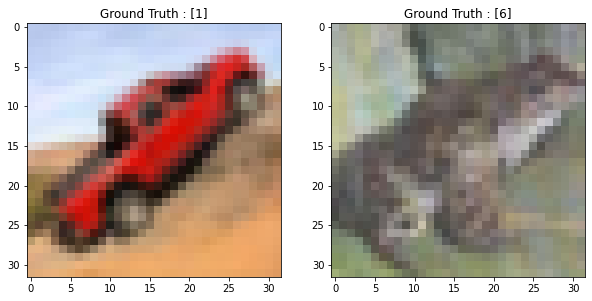

In [ ]:
data_point = 140

plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[data_point]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[data_point]))

In [ ]:
print("max pixel = "+str(np.max(X_train[0])),"\n""min pixel = "+str(np.min(X_train[0]))) #checking the range of that data, for normalization

max pixel = 255 
min pixel = 0


In [ ]:
X_train = X_train / 255 #Normalizing the data
X_test = X_test / 255

In [ ]:
#The target are cartegorical, thus we apply one hot encoding
print(Y_train[0]) #data check before one hot encoding
print(Y_test[0])

[6]
[3]


In [ ]:
Y_train = np_utils.to_categorical(Y_train, 10) # One hot encoding
Y_test = np_utils.to_categorical(Y_test, 10)
num_classes = 10

In [ ]:
print(Y_train[0]) #Data check after one hot encoding
print(Y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3) #spliting into training and validation data sets

# Create a convolutional neural network

In [ ]:
# Creating the model
def baseline_model():
    model = Sequential()
    
    # Since this is the first layer, we need to specify the input shape. Only here, only once.
    # We are creating 64 filters each of size 2x2. What will be the depth of each of those 64 filters?

    # "valid" means no padding. "same" results in padding with zeros evenly to the 
    # left/right or up/down of the input such that output has the same height/width dimension as the input. 
    model.add(Conv2D(filters=64, kernel_size=2, activation='relu', input_shape=(32,32,3))) 
    
    # Here we create a 2x2 max pooling layer
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=124, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=124, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=100,kernel_size=2, padding='same', activation='relu'))

    
    model.add(Flatten())
    
    model.add(Dense(500, activation='relu'))

    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    loss = CategoricalCrossentropy()
    
    # Compile the model
    model.compile(loss=loss,
             optimizer='adam',
             metrics=['accuracy'])
    return model

## Determine the number of trainable parameters

In [ ]:
# checking the model
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 124)       31868     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 124)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 124)         61628     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 124)        0

## Train the model


In [ ]:
#Training the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs = 100,batch_size=200)

Epoch 1/20
175/175 [==============================] - 17s 20ms/step - loss: 1.7009 - accuracy: 0.3761 - val_loss: 1.3818 - val_accuracy: 0.4934
Epoch 2/20
175/175 [==============================] - 3s 17ms/step - loss: 1.3258 - accuracy: 0.5209 - val_loss: 1.3265 - val_accuracy: 0.5241
Epoch 3/20
175/175 [==============================] - 3s 17ms/step - loss: 1.1759 - accuracy: 0.5814 - val_loss: 1.2039 - val_accuracy: 0.5706
Epoch 4/20
175/175 [==============================] - 3s 17ms/step - loss: 1.0522 - accuracy: 0.6285 - val_loss: 1.0312 - val_accuracy: 0.6305
Epoch 5/20
175/175 [==============================] - 3s 17ms/step - loss: 0.9695 - accuracy: 0.6587 - val_loss: 0.9641 - val_accuracy: 0.6626
Epoch 6/20
175/175 [==============================] - 3s 17ms/step - loss: 0.8748 - accuracy: 0.6941 - val_loss: 0.9421 - val_accuracy: 0.6702
Epoch 7/20
175/175 [==============================] - 3s 18ms/step - loss: 0.8113 - accuracy: 0.7149 - val_loss: 0.9150 - val_accuracy: 0.681

## Plot the performance

Plot the training and validation accuracy in a single plot

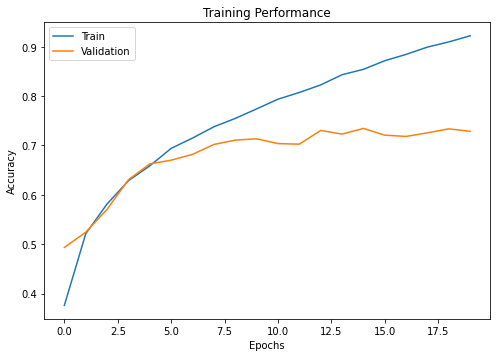

In [ ]:
#ploting the performance of the training model and its performance on the validation data 
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return
plot_hist(history.history, xsize=8, ysize=12)

## Predict on the test data

In [ ]:
prediction = model.predict(X_test)# PRECDICTING ON THE TEST DATA
prediction #Data checking

array([[3.77449260e-06, 6.60191581e-04, 5.05944663e-05, ...,
        7.84560507e-06, 2.35762423e-06, 9.51474874e-07],
       [1.31407476e-04, 6.50251191e-03, 3.04061132e-09, ...,
        1.27987099e-09, 9.93295968e-01, 7.01504614e-05],
       [1.18830828e-02, 1.95016667e-01, 6.91603782e-05, ...,
        6.79924005e-06, 7.86907971e-01, 6.05898770e-03],
       ...,
       [2.50324483e-10, 2.72617540e-10, 3.00940010e-04, ...,
        4.11066212e-05, 2.49965687e-10, 3.22745830e-09],
       [1.00992108e-02, 3.53143662e-02, 1.63722560e-02, ...,
        1.96857397e-02, 6.10168354e-05, 6.86259416e-04],
       [1.13141635e-10, 2.85457747e-13, 1.62602433e-07, ...,
        9.99389172e-01, 3.15346605e-14, 1.08129235e-11]], dtype=float32)

In [ ]:
prediction_classes = np.argmax(prediction, axis=1)#conveting the model output to its equivalent categories
prediction_classes #Data check

array([3, 8, 8, ..., 5, 4, 7])

## Compute the accuracy

Get at least 65% testing accuracy

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes) #checking the accuracy of the model

0.7312

## Obtain the confusion matrix

In [ ]:
#computing the confusion matrix. The diagonals show  correctly classified values/images, while other entries show how many values belonging to a different class were classifies in the wrong class
confusion_matrix(np.argmax(Y_test,1), prediction_classes) 